<a href="https://colab.research.google.com/github/Alicia-Alexia/7_days_of_code/blob/main/7_days_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Célula 1 — Importações

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

📌 Célula 2 — Leitura dos Dados

In [5]:
# URL do parquet de exemplares
url_exemplares = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet"
df_exemplares = pd.read_parquet(url_exemplares, engine="pyarrow")

# --- Carregar todos os empréstimos ---
arquivos = [
    "emprestimos-20101.csv","emprestimos-20102.csv",
    "emprestimos-20111.csv","emprestimos-20112.csv",
    "emprestimos-20121.csv","emprestimos-20122.csv",
    "emprestimos-20131.csv","emprestimos-20132.csv",
    "emprestimos-20141.csv","emprestimos-20142.csv",
    "emprestimos-20151.csv","emprestimos-20152.csv",
    "emprestimos-20161.csv","emprestimos-20162.csv",
    "emprestimos-20171.csv","emprestimos-20172.csv",
    "emprestimos-20181.csv","emprestimos-20182.csv",
    "emprestimos-20191.csv","emprestimos-20192.csv",
    "emprestimos-20201.csv"
]
url_base = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/"
df = pd.concat([pd.read_csv(url_base + arq).assign(arquivo=arq) for arq in arquivos],
               ignore_index=True)

df.head()
df_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


📌 Célula 3 — Limpeza dos Dados

In [6]:
# Remover coluna que não faz sentido
df_exemplares.info()
df_exemplares = df_exemplares.drop(columns=['registro_sistema'])

# Converter matrícula para string
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('Int64').astype(str)

# Remover duplicados
df = df.drop_duplicates()
df_exemplares = df_exemplares.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2257981 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_emprestimo         int64 
 1   codigo_barras         object
 2   data_renovacao        object
 3   data_emprestimo       object
 4   data_devolucao        object
 5   matricula_ou_siape    object
 6   tipo_vinculo_usuario  object
 7   arq

📌 Célula 4 — Criar Função de Classificação CDU

In [7]:
def classificar_CDU(cod):
    try:
        if 0 <= cod <= 99:
            return "000-099: Generalidades. Ciência e conhecimento"
        elif 100 <= cod <= 199:
            return "100-199: Filosofia e psicologia"
        elif 200 <= cod <= 299:
            return "200-299: Religião"
        elif 300 <= cod <= 399:
            return "300-399: Ciências sociais"
        elif 400 <= cod <= 499:
            return "400-499: Classe vaga (não ocupada)"
        elif 500 <= cod <= 599:
            return "500-599: Matemática e ciências naturais"
        elif 600 <= cod <= 699:
            return "600-699: Ciências aplicadas"
        elif 700 <= cod <= 799:
            return "700-799: Belas artes"
        elif 800 <= cod <= 899:
            return "800-899: Linguagem. Língua. Linguística"
        elif 900 <= cod <= 999:
            return "900-999: Geografia. Biografia. História"
        else:
            return "Outro / Não classificado"
    except:
        return "Inválido"

df_exemplares['classe_CDU'] = df_exemplares['localizacao'].apply(classificar_CDU)
df_exemplares[['localizacao', 'classe_CDU']].head()


,localizacao,classe_CDU
index,,
0,694,600-699: Ciências aplicadas
1,688,600-699: Ciências aplicadas
2,638,600-699: Ciências aplicadas
3,616,600-699: Ciências aplicadas
5,657,600-699: Ciências aplicadas


📌 Célula 5 — Juntar Dados de Empréstimos + Exemplares


In [8]:
df_merged = df.merge(
    df_exemplares[['codigo_barras','biblioteca','colecao','classe_CDU']],
    on='codigo_barras',
    how='left'
)

df_merged.head()


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,arquivo,biblioteca,colecao,classe_CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Setorial Prof. Rodolfo Helinski - E...,Acervo Circulante,600-699: Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas


1️⃣ A quantidade de empréstimos está aumentando ou diminuindo ao longo dos anos?

Empréstimos por ano:
ano
2010    196147
2011    229548
2012    250260
2013    259598
2014    235725
2015    225317
2016    226380
2017    229527
2018    202613
2019    180028
2020     26636
Name: count, dtype: int64


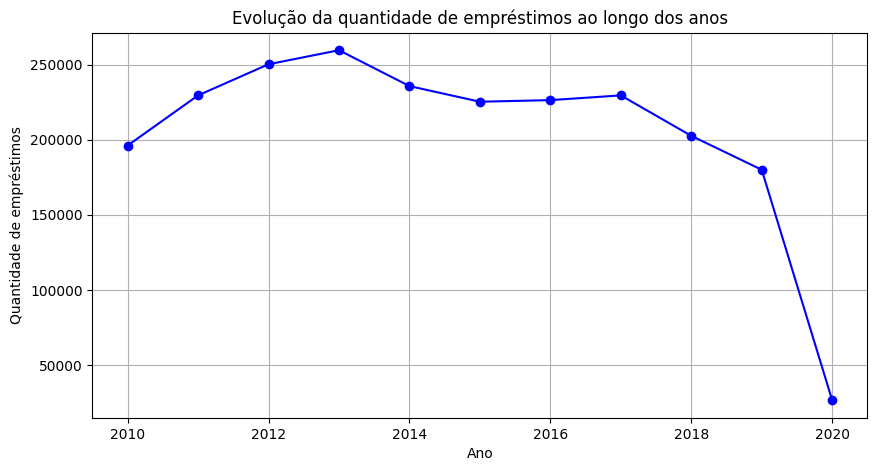

In [9]:
# Converter coluna de data para datetime
df_merged['data_emprestimo'] = pd.to_datetime(df_merged['data_emprestimo'], errors='coerce')

# Criar coluna do ano
df_merged['ano'] = df_merged['data_emprestimo'].dt.year

# Contagem de empréstimos por ano
emprestimos_por_ano = df_merged['ano'].value_counts().sort_index()

print("Empréstimos por ano:")
print(emprestimos_por_ano)

# Visualização
plt.figure(figsize=(10,5))
emprestimos_por_ano.plot(kind='line', marker='o', color='blue')
plt.title("Evolução da quantidade de empréstimos ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade de empréstimos")
plt.grid(True)
plt.show()


2️⃣ Em quais bibliotecas estão a maior quantidade de empréstimos?

Top 10 bibliotecas com mais empréstimos:
biblioteca
Biblioteca Central Zila Mamede                                                              1426122
Biblioteca Setorial do Centro Ciências da Saúde - CCS                                        118614
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz         77609
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia               66447
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó                     61478
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN                    46040
Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA                     40744
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó                                       32097
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos                   29089
Biblioteca Setorial Prof. Rodolfo Helinski - Esc

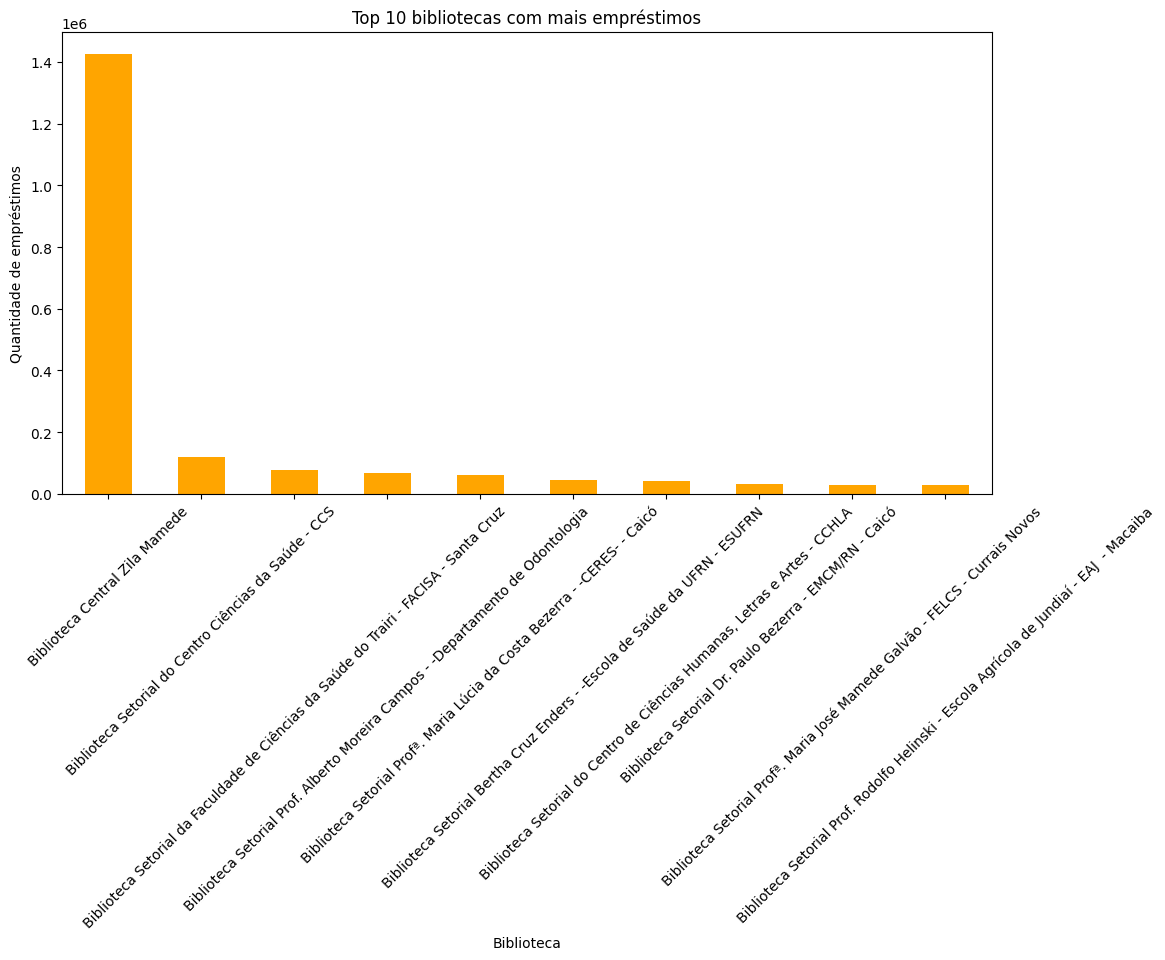

In [10]:
# Contagem de empréstimos por biblioteca
emprestimos_por_biblioteca = df_merged['biblioteca'].value_counts()

print("Top 10 bibliotecas com mais empréstimos:")
print(emprestimos_por_biblioteca.head(10))

# Visualização
plt.figure(figsize=(12,6))
emprestimos_por_biblioteca.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 bibliotecas com mais empréstimos")
plt.xlabel("Biblioteca")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45)
plt.show()


3️⃣ Quais são os temas mais emprestados e os menos?

Top 10 temas mais emprestados:
colecao
Acervo Circulante                        2053120
Multimeios                                  7954
Monografias                                 4021
Dissertações                                2406
Obras de Referência                         1954
Publicações de Autores do RN                 866
Publicações da UFRN                          764
Teses                                        714
Folhetos                                     271
Necessidades Educacionais Específicas        130
Name: count, dtype: int64

Top 10 temas menos emprestados:
colecao
Publicações da UFRN                      764
Teses                                    714
Folhetos                                 271
Necessidades Educacionais Específicas    130
Trabalho Acadêmico                       115
Eventos                                  101
Coleção Mossoroense                       44
Coleção Zila Mamede                       30
Literatura de Cordel                      24

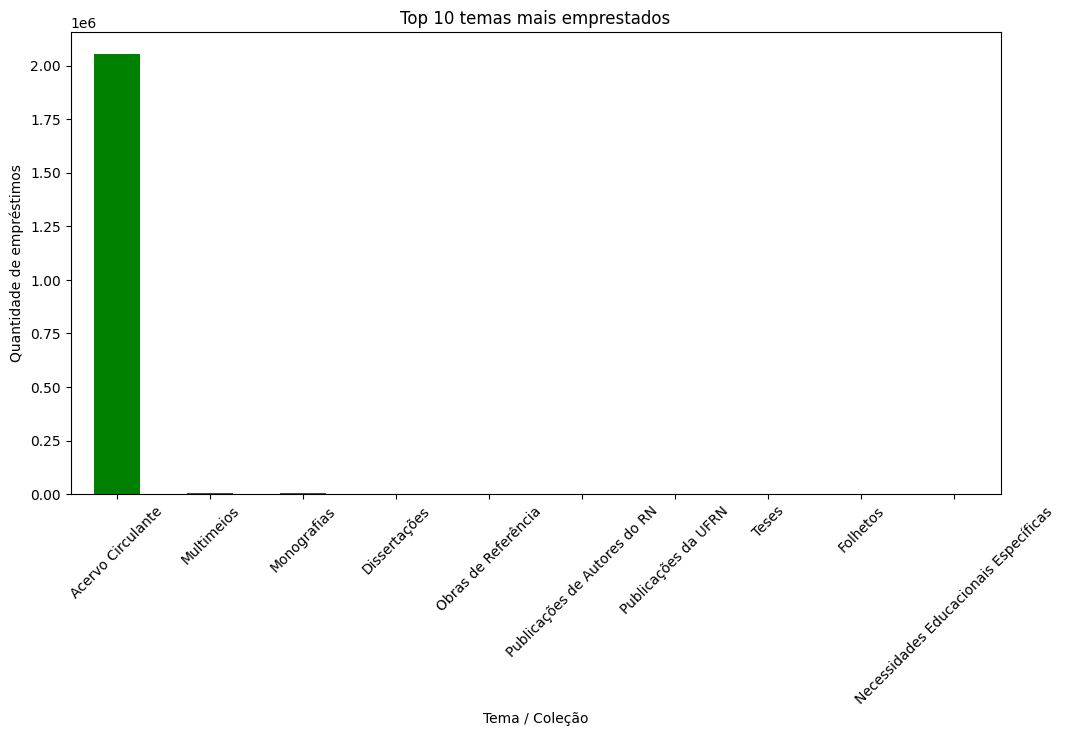

In [11]:
# Contagem de empréstimos por tema/coleção
emprestimos_por_tema = df_merged['colecao'].value_counts()

print("Top 10 temas mais emprestados:")
print(emprestimos_por_tema.head(10))

print("\nTop 10 temas menos emprestados:")
print(emprestimos_por_tema.tail(10))

# Visualização dos principais temas
plt.figure(figsize=(12,6))
emprestimos_por_tema.head(10).plot(kind='bar', color='green')
plt.title("Top 10 temas mais emprestados")
plt.xlabel("Tema / Coleção")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45)
plt.show()


📌 Célula 6 — Análise Exploratória

Top 10 classes CDU mais emprestadas:
classe_CDU
600-699: Ciências aplicadas                       1425473
300-399: Ciências sociais                          369536
500-599: Matemática e ciências naturais             68744
000-099: Generalidades. Ciência e conhecimento      62521
200-299: Religião                                   62295
100-199: Filosofia e psicologia                     60563
900-999: Geografia. Biografia. História              7989
700-799: Belas artes                                 7911
800-899: Linguagem. Língua. Linguística              7490
Name: count, dtype: int64


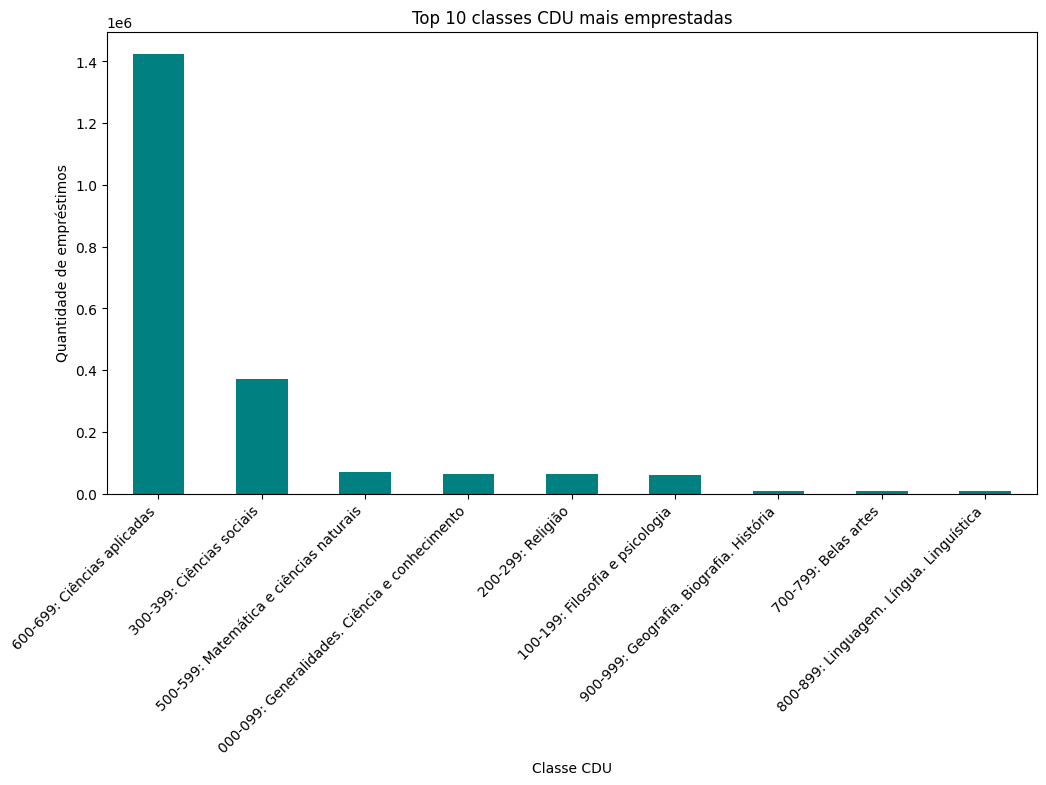

In [12]:
# Top 10 classes da CDU mais emprestadas
top_cdu = df_merged['classe_CDU'].value_counts().head(10)
print("Top 10 classes CDU mais emprestadas:")
print(top_cdu)

# Visualização
plt.figure(figsize=(12,6))
top_cdu.plot(kind='bar', color='teal')
plt.title("Top 10 classes CDU mais emprestadas")
plt.xlabel("Classe CDU")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45, ha='right')
plt.show()


Evolução anual da quantidade de exemplares emprestados Preparação dos dados

In [20]:
# Converter a coluna de data
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'], errors='coerce')

# Criar colunas auxiliares
df['ano'] = df['data_emprestimo'].dt.year
df['mes'] = df['data_emprestimo'].dt.month
df['hora'] = df['data_emprestimo'].dt.hour

# Fazer merge para cruzar empréstimos e exemplares
df_merged = df.merge(
    df_exemplares[['codigo_barras', 'biblioteca', 'classe_CDU']],
    on="codigo_barras",
    how="left"
)


Análise por ano

📊 Empréstimos por ano:
ano
2010    196147
2011    229548
2012    250260
2013    259598
2014    235725
2015    225317
2016    226380
2017    229527
2018    202613
2019    180028
2020     26636
Name: id_emprestimo, dtype: int64


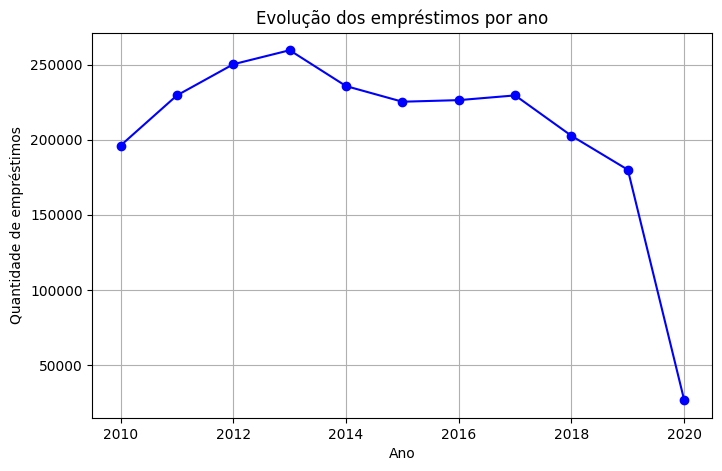

In [21]:
emprestimos_por_ano = df_merged.groupby('ano')['id_emprestimo'].count()
print("📊 Empréstimos por ano:")
print(emprestimos_por_ano)

plt.figure(figsize=(8,5))
emprestimos_por_ano.plot(kind='line', marker='o', color='blue')
plt.title("Evolução dos empréstimos por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de empréstimos")
plt.grid(True)
plt.show()



Bibliotecas com mais empréstimos



🏛️ Bibliotecas com mais empréstimos:
biblioteca
Biblioteca Central Zila Mamede                                                              1426122
Biblioteca Setorial do Centro Ciências da Saúde - CCS                                        118614
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz         77609
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia               66447
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó                     61478
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN                    46040
Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA                     40744
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó                                       32097
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos                   29089
Biblioteca Setorial Prof. Rodolfo Helinski - Escola

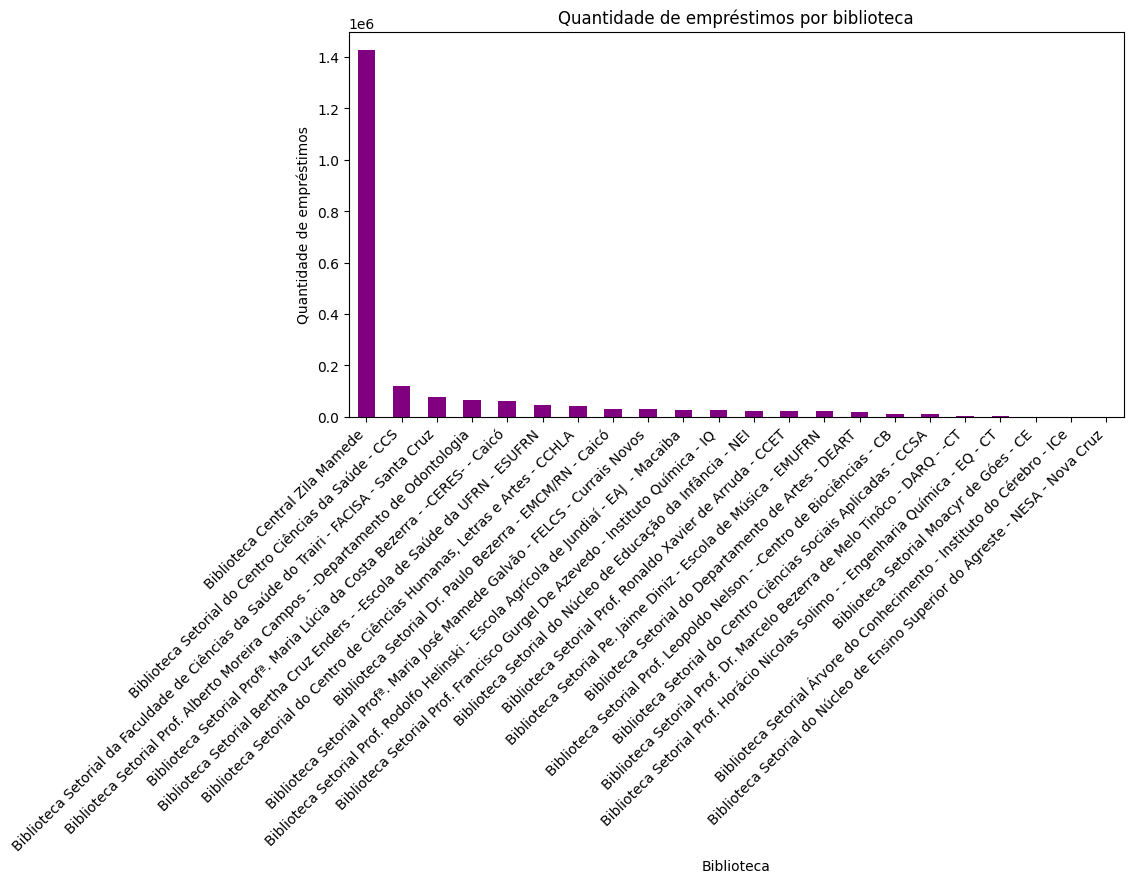

In [22]:
emprestimos_biblioteca = df_merged.groupby('biblioteca')['id_emprestimo'].count().sort_values(ascending=False)
print("\n🏛️ Bibliotecas com mais empréstimos:")
print(emprestimos_biblioteca)

plt.figure(figsize=(10,5))
emprestimos_biblioteca.plot(kind='bar', color='purple')
plt.title("Quantidade de empréstimos por biblioteca")
plt.xlabel("Biblioteca")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45, ha='right')
plt.show()

Temas (CDU) mais e menos emprestados


📚 Temas mais emprestados (CDU):
classe_CDU
600-699: Ciências aplicadas                       1425473
300-399: Ciências sociais                          369536
500-599: Matemática e ciências naturais             68744
000-099: Generalidades. Ciência e conhecimento      62521
200-299: Religião                                   62295
100-199: Filosofia e psicologia                     60563
900-999: Geografia. Biografia. História              7989
700-799: Belas artes                                 7911
800-899: Linguagem. Língua. Linguística              7490
Name: id_emprestimo, dtype: int64

📚 Temas menos emprestados (CDU):
classe_CDU
600-699: Ciências aplicadas                       1425473
300-399: Ciências sociais                          369536
500-599: Matemática e ciências naturais             68744
000-099: Generalidades. Ciência e conhecimento      62521
200-299: Religião                                   62295
100-199: Filosofia e psicologia                     60563
900-999

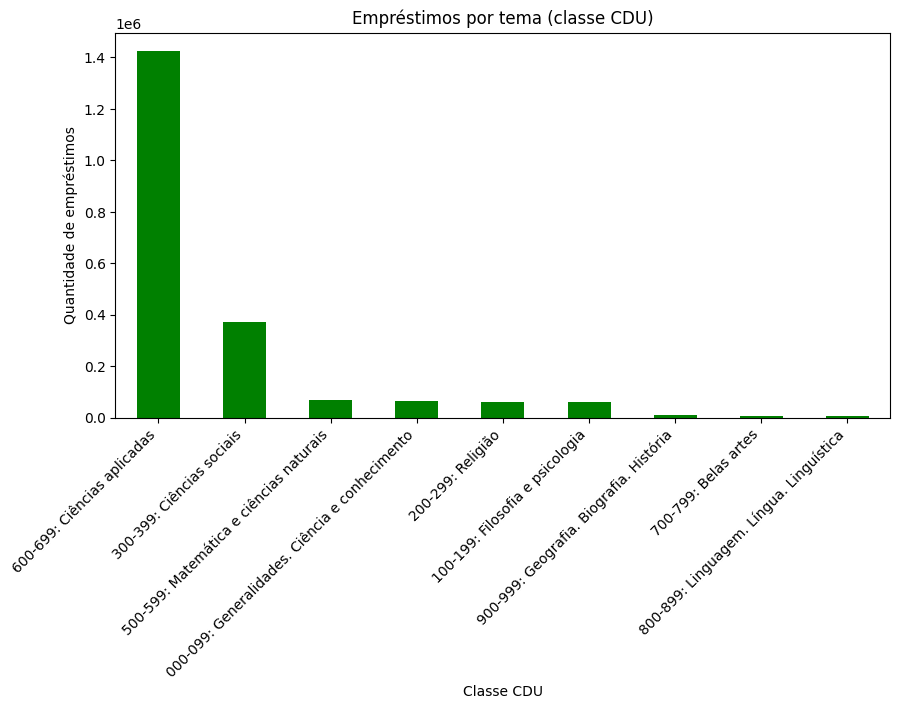

In [23]:
emprestimos_cdu = df_merged.groupby('classe_CDU')['id_emprestimo'].count().sort_values(ascending=False)
print("\n📚 Temas mais emprestados (CDU):")
print(emprestimos_cdu.head(10))
print("\n📚 Temas menos emprestados (CDU):")
print(emprestimos_cdu.tail(10))

plt.figure(figsize=(10,5))
emprestimos_cdu.plot(kind='bar', color='green')
plt.title("Empréstimos por tema (classe CDU)")
plt.xlabel("Classe CDU")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45, ha='right')
plt.show()

📌 Gráfico mensal com destaques

Mês de maior movimento: 3, com 275780 empréstimos.
Mês de menor movimento: 1, com 72183 empréstimos.


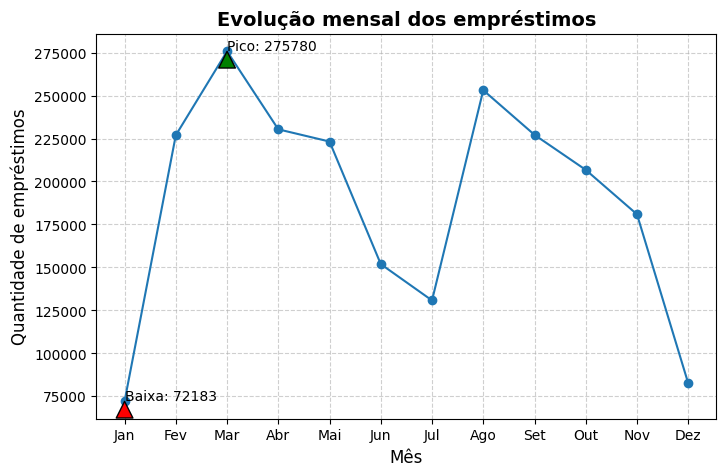

In [48]:
# Agrupar por mês
emprestimos_por_mes = df_merged.groupby('mes')['id_emprestimo'].count()

# Identificar maior e menor mês
mes_max = emprestimos_por_mes.idxmax()
mes_min = emprestimos_por_mes.idxmin()

# Imprimir os valores de mínimo e máximo antes de gerar o gráfico
print(f"Mês de maior movimento: {mes_max}, com {emprestimos_por_mes.loc[mes_max]} empréstimos.")
print(f"Mês de menor movimento: {mes_min}, com {emprestimos_por_mes.loc[mes_min]} empréstimos.")

plt.figure(figsize=(8,5))
emprestimos_por_mes.plot(kind='line', marker='o', color='#1f77b4')  # azul acessível
plt.title("Evolução mensal dos empréstimos", fontsize=14, weight='bold')
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Quantidade de empréstimos", fontsize=12)
plt.xticks(range(1,13), [
    "Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
    "Jul", "Ago", "Set", "Out", "Nov", "Dez"
])
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar mês de maior movimento
plt.annotate(f"Pico: {emprestimos_por_mes[mes_max]}",
             xy=(mes_max, emprestimos_por_mes[mes_max]),
             xytext=(mes_max, emprestimos_por_mes[mes_max]+200),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Anotar mês de menor movimento
plt.annotate(f"Baixa: {emprestimos_por_mes[mes_min]}",
             xy=(mes_min, emprestimos_por_mes[mes_min]),
             xytext=(mes_min, emprestimos_por_mes[mes_min]+200),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

📌 Gráfico por hora do dia com destaques

Hora de maior movimento: 16h, com 226892 empréstimos.
Hora de menor movimento: 6h, com 18 empréstimos.


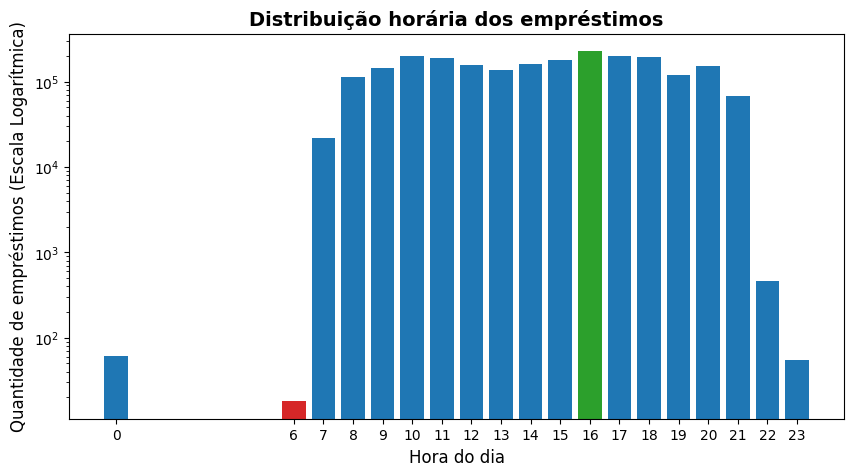

In [49]:
# Agrupar por hora (isso já filtra para ter apenas horas com empréstimos)
emprestimos_por_hora = df_merged.groupby('hora')['id_emprestimo'].count()

# Identificar hora de maior e menor movimento
hora_max = emprestimos_por_hora.idxmax()
hora_min = emprestimos_por_hora.idxmin()

# Imprimir os valores de mínimo e máximo antes de gerar o gráfico
print(f"Hora de maior movimento: {hora_max}h, com {emprestimos_por_hora.loc[hora_max]} empréstimos.")
print(f"Hora de menor movimento: {hora_min}h, com {emprestimos_por_hora.loc[hora_min]} empréstimos.")

# Criar lista de cores
cores = []
for h in emprestimos_por_hora.index:
    if h == hora_max:
        cores.append('#2ca02c')  # verde
    elif h == hora_min:
        cores.append('#d62728')  # vermelho
    else:
        cores.append('#1f77b4')  # azul

plt.figure(figsize=(10, 5))
plt.bar(emprestimos_por_hora.index, emprestimos_por_hora.values, color=cores)

plt.title("Distribuição horária dos empréstimos", fontsize=14, weight='bold')
plt.xlabel("Hora do dia", fontsize=12)
plt.ylabel("Quantidade de empréstimos (Escala Logarítmica)", fontsize=12)

# Define os ticks do eixo X para incluir apenas os horários que existem nos dados
plt.xticks(emprestimos_por_hora.index, rotation=0)

# Aplica a escala logarítmica para uma visualização clara
plt.yscale('log')

plt.show()